#Clustering clean_ads
The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset.

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset.

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path=("/content/drive/MyDrive/Clustering Clean Ads_Data-2.xlsx")
df=pd.read_excel(path)

Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [ ]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [ ]:
df["Device Type"].value_counts()

Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
df.shape

(23066, 19)

In [ ]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


Treat missing values in CPC, CTR and CPM using the formula given.  
Missing values are treated using formula given in the problem statement.
* ctr=(clicks/impressions)
* cpm=((spend/impressions)*1000)
* cpc=(spend/clicks)


In [ ]:
df["CTR"]=df["CTR"].fillna(0)
df["CPM"]=df["CPM"].fillna(0)
df["CPC"]=df["CPC"].fillna(0)

In [ ]:
def calculate_ctr(x):
    Clicks=df.Clicks
    Impressions=df.Impressions
    ctr = (Clicks/Impressions)
    return ctr

In [ ]:
df["CTR"]= df[["CTR"]].apply(lambda x: calculate_ctr(x))

In [ ]:
def cpm(x):
  Spend=df.Spend
  Impressions=df.Impressions
  cpm=((Spend/Impressions)*1000)
  return cpm

In [ ]:
df["CPM"]= df[["CPM"]].apply(lambda x: cpm(x))

In [ ]:
def cpc(x):
  Spend=df.Spend
  Clicks=df.Clicks
  cpc=(Spend/Clicks)
  return cpc

In [ ]:
df["CPC"]= df[["CPC"]].apply(lambda x: cpc(x))

In [ ]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.000000,72000.000000,72000.000000,8.400000e+04,2.160000e+05
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.000000,33672.250000,483771.000000,2.527712e+06,2.759286e+07
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.000000,18282.500000,258087.500000,1.180700e+06,1.470202e+07
Impressions,23066.0,1.241520e+06,2.429400e+06,1.000000,7990.500000,225290.000000,1.112428e+06,1.419477e+07
Clicks,23066.0,1.067852e+04,1.735341e+04,1.000000,710.000000,4425.000000,1.279375e+04,1.430490e+05
Spend,23066.0,2.706626e+03,4.067927e+03,0.000000,85.180000,1425.125000,3.121400e+03,2.693187e+04
Fee,23066.0,3.351231e-01,3.196322e-02,0.210000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.924252e+03,3.105238e+03,0.000000,55.365375,926.335000,2.091338e+03,2.127618e+04


In [ ]:
data=df.copy()

In [ ]:
data=df.drop(["Timestamp","InventoryType","Ad - Length","Ad- Width","Ad Size","Ad Type","Platform","Device Type","Format"],axis=1)

In [ ]:
data.head()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,1806,325,323,1,0.0,0.35,0.0,0.003096,0.0,0.0
1,1780,285,285,1,0.0,0.35,0.0,0.003509,0.0,0.0
2,2727,356,355,1,0.0,0.35,0.0,0.002817,0.0,0.0
3,2430,497,495,1,0.0,0.35,0.0,0.002020,0.0,0.0
4,1218,242,242,1,0.0,0.35,0.0,0.004132,0.0,0.0


Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

* There are outliers in all the variables except Ad-length and Ad-width variables.
* Treating outliers is necessary for K-Means clustering, as due to extreme values of outliers the mean value is severely affected and K-Means itself works on mean values otherwise the accuracy of the method we use will not be accurate.
* 25th quartile and 75th quartile values of all the variables is taken.
* Using them upper range and lower range values are taken and outliers values are found out by using formula
for lower_range= q25-(IQR * 1.5) and upper_range=q75+(IQR*1.5).
* If value is greater than Q3 + (1.5 * IQR), we can cap the values to 75th percentile value and if it is lesser than Q1 - (1.5*IQR), we can cap the values to 25th percentile value.





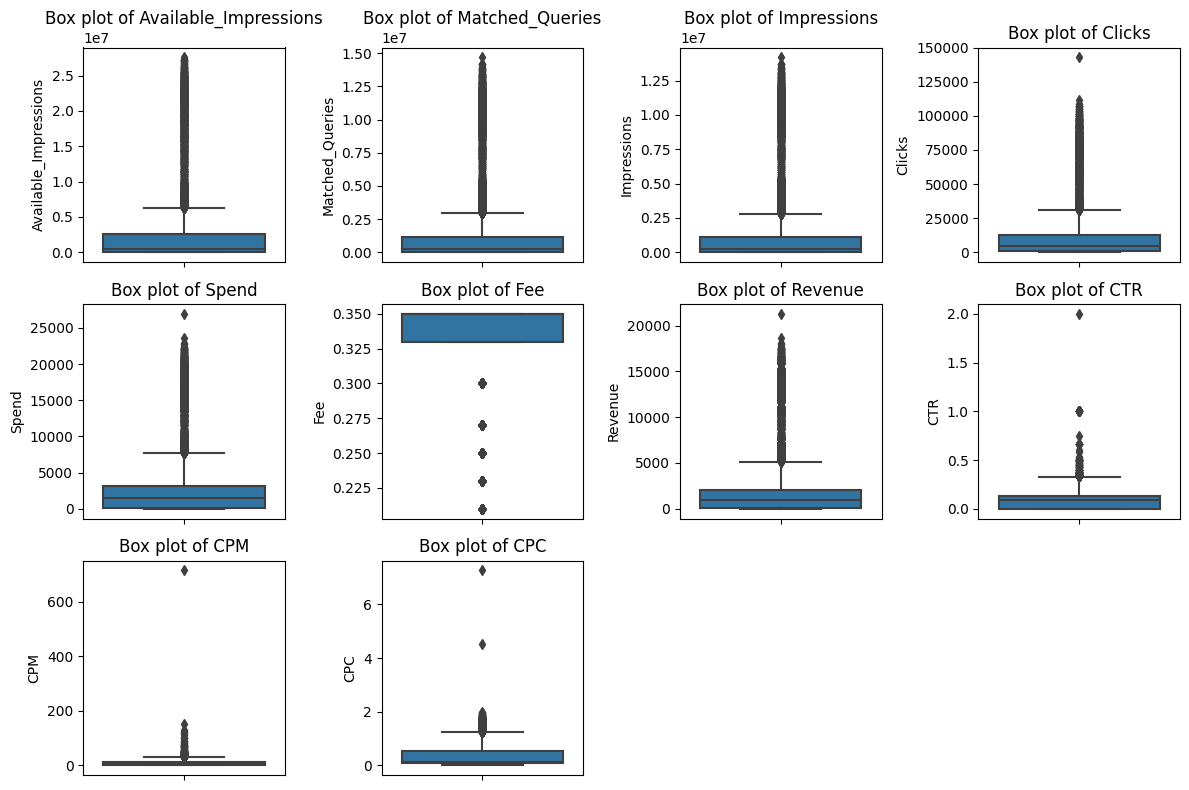

In [ ]:
plt.figure(figsize=(12,8))
feature_list=data.columns
for i in range(len(feature_list)):
  plt.subplot(3,4,i+1)
  sns.boxplot(y=data[feature_list[i]],data=data)
  plt.title("Box plot of {}".format(feature_list[i]))
  plt.tight_layout()

In [ ]:
def treat_outlier(x):
  q25=np.percentile(x,25)
  q75=np.percentile(x,75)
  iqr=q75-q25
  lower_range=q25-(1.5*iqr)
  upper_range=q75+(1.5*iqr)
  return lower_range,upper_range

In [ ]:
for i in feature_list:
    LL, UL = treat_outlier(data[i])
    data[i] = np.where(data[i] > UL, UL, data[i])
    data[i] = np.where(data[i] < LL, LL, data[i])

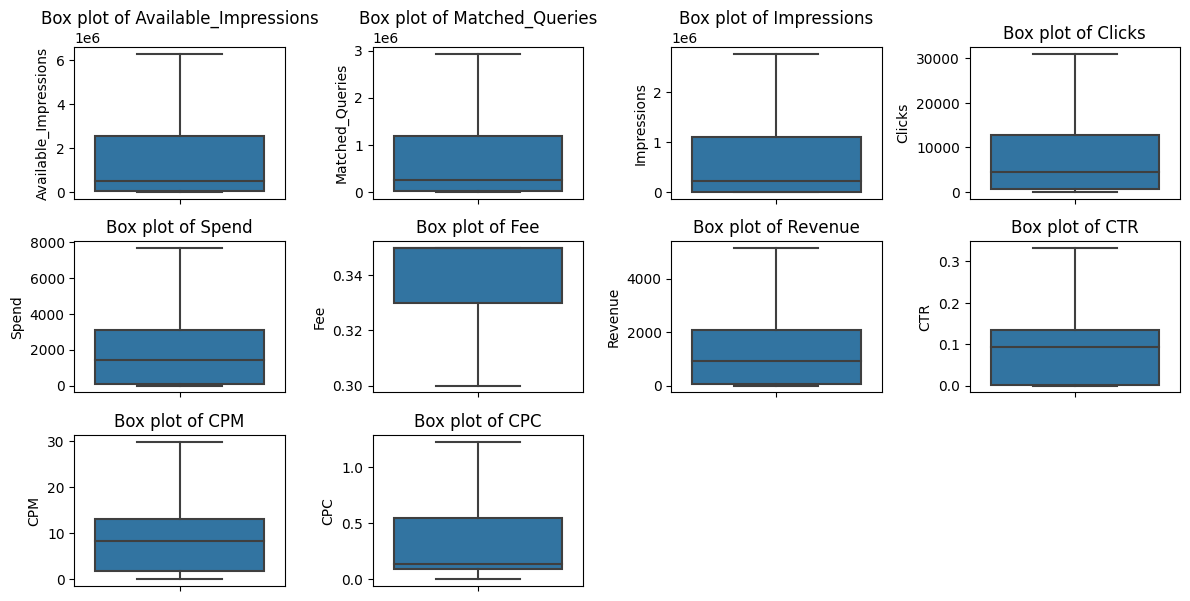

In [ ]:
plt.figure(figsize=(12,8))
feature_list=data.columns
for i in range(len(feature_list)):
  plt.subplot(4,4,i+1)
  sns.boxplot(y=data[feature_list[i]],data=data)
  plt.title("Box plot of {}".format(feature_list[i]))
  plt.tight_layout()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available_Impressions,23066.0,1.607253e+06,2.125528e+06,1.000000,33672.250000,483771.000000,2.527712e+06,6.268771e+06
Matched_Queries,23066.0,7.995380e+05,1.026037e+06,1.000000,18282.500000,258087.500000,1.180700e+06,2.924326e+06
Impressions,23066.0,7.536120e+05,9.802568e+05,1.000000,7990.500000,225290.000000,1.112428e+06,2.769086e+06
Clicks,23066.0,8.306828e+03,9.574779e+03,1.000000,710.000000,4425.000000,1.279375e+04,3.091938e+04
Spend,23066.0,2.166060e+03,2.425190e+03,0.000000,85.180000,1425.125000,3.121400e+03,7.675730e+03
Fee,23066.0,3.402883e-01,1.812855e-02,0.300000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.449389e+03,1.646894e+03,0.000000,55.365375,926.335000,2.091338e+03,5.145297e+03
CTR,23066.0,8.223203e-02,8.253522e-02,0.000109,0.002651,0.093912,1.347057e-01,3.327877e-01
CPM,23066.0,8.219181e+00,6.881016e+00,0.000000,1.749084,8.371566,1.304202e+01,2.998142e+01
CPC,23066.0,3.300346e-01,3.165682e-01,0.000000,0.089736,0.139347,5.462421e-01,1.231002e+00


 Perform z-score scaling and discuss how it affects the speed of the algorithm.


In [ ]:
from scipy.stats import zscore

In [ ]:
data_scaled=data.apply(zscore)

In [ ]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Available_Impressions,23066.0,9.857525e-18,1.000022,-0.756182,-0.740341,-0.528577,0.433059,2.193158
Matched_Queries,23066.0,1.971505e-17,1.000022,-0.779265,-0.761447,-0.527722,0.371498,2.070914
Impressions,23066.0,0.000000e+00,1.000022,-0.768806,-0.760655,-0.538975,0.366051,2.056111
Clicks,23066.0,-1.182903e-16,1.000022,-0.867488,-0.793438,-0.405431,0.468629,2.361729
Spend,23066.0,-9.857525e-17,1.000022,-0.893170,-0.858046,-0.305523,0.393932,2.271900
Fee,23066.0,1.143473e-15,1.000022,-2.222416,-0.567532,0.535724,0.535724,0.535724
Revenue,23066.0,3.943010e-17,1.000022,-0.880093,-0.846474,-0.317607,0.389803,2.244218
CTR,23066.0,6.900268e-17,1.000022,-0.995031,-0.964227,0.141524,0.635787,3.035808
CPM,23066.0,2.464381e-17,1.000022,-1.194498,-0.940303,0.022146,0.700905,3.162718
CPC,23066.0,3.943010e-17,1.000022,-1.042561,-0.759091,-0.602371,0.682987,2.846105


In [ ]:
data_scaled.head()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.946281,-1.194498,-1.042561


* The values of some of the variables are zeroes, some are ones, some have double digits while some are in thousands,
By using scaling method we can bring all the numerical variables in the same weightage, it will be easy for us to perform clustering after scaling the variables.
* In K-Means clustering we will perform clustering process depending on the distance, it will be helpful for us if the variables are in same scale or the distance between the variables is reduced otherwise it will affect the accuracy of the results.
* The mean of all the values obtained are close to 0 and standard deviation of all values is close to 1. This will help us in performing clustering, as all the values are close to each other, the accuracy of the values obtained will be more.





Perform clustering and do the following:Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

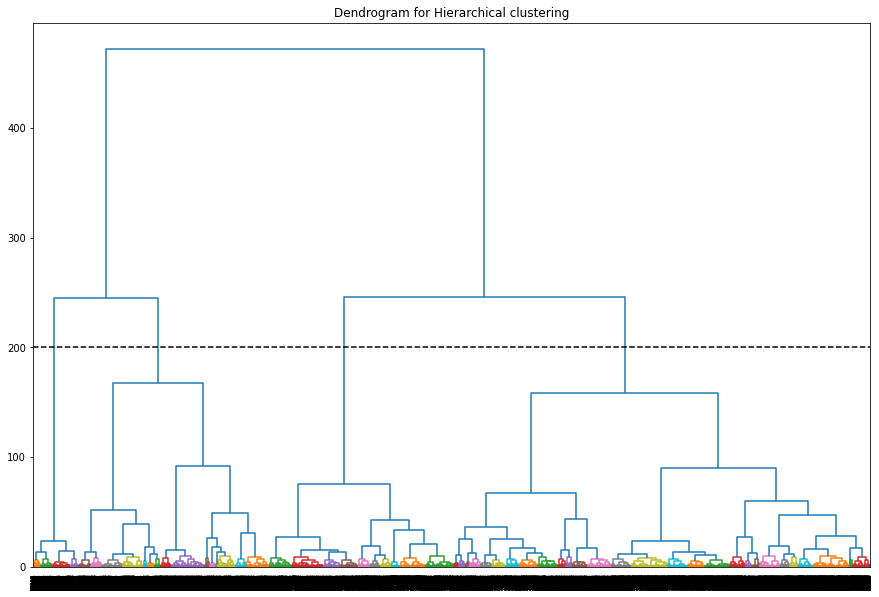

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Dendrogram for Hierarchical clustering")
dend=shc.dendrogram(shc.linkage(data_scaled,method="ward"),color_threshold=10)
plt.axhline(200,color="black",linestyle="--")
plt.show()

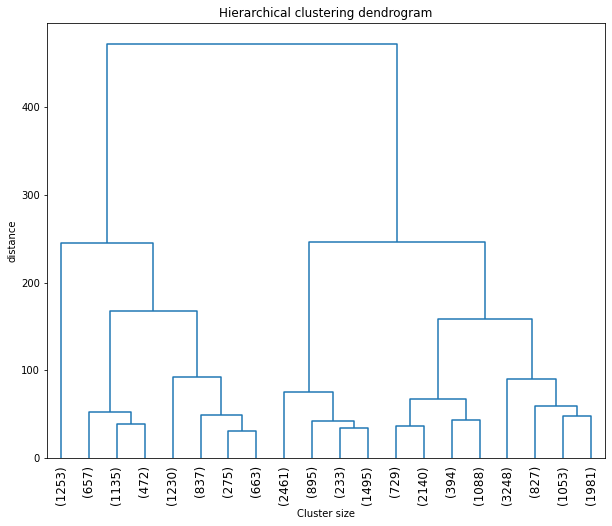

In [ ]:
plt.figure(figsize=(10,8))
z_final=linkage(data_scaled,"ward",metric="euclidean")
plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Cluster size")
plt.ylabel("distance")
dendrogram(z_final,truncate_mode="lastp",p=20,leaf_rotation=90,leaf_font_size=12,color_threshold=10)
plt.show()

In [ ]:
clusters_1=shc.fcluster(shc.linkage(data_scaled,method="ward"),4,criterion="maxclust") #by providing the no. of clusters we needed
clusters_1

array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [ ]:
clusters_2=shc.fcluster(shc.linkage(data_scaled,method="ward"),200,criterion="distance")  #by providing the distance
clusters_2

array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [ ]:
data["Cluster_1"]=clusters_1
data["Cluster_2"]=clusters_2
data.head()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster_1,Cluster_2
0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.003096,0.0,0.0,3,3
1,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.003509,0.0,0.0,3,3
2,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.002817,0.0,0.0,3,3
3,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.002020,0.0,0.0,3,3
4,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.004132,0.0,0.0,3,3


In [ ]:
df1=data.drop(["Cluster_2"],axis=1)
df_cluster_1=df1.groupby("Cluster_1").mean()
cluster_1_freq=data["Cluster_1"].value_counts().sort_index()
df_cluster_1["Cluster_count"]=cluster_1_freq
df_cluster_1

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster_count
Cluster_1,,,,,,,,,,,
1,8.787287e+05,6.207391e+05,5.238120e+05,30914.451716,7101.199234,0.300000,4863.025345,0.137743,15.215559,0.110390,1253
2,5.003632e+06,2.506395e+06,2.393386e+06,9401.625356,5024.426386,0.320871,3382.708798,0.002178,1.629365,0.772586,5269
3,1.592872e+06,7.080503e+05,6.705372e+05,3257.333792,1222.940116,0.350000,794.911066,0.004492,1.782737,0.450149,5084
4,1.317232e+05,7.490724e+04,6.166800e+04,7571.731425,730.663997,0.349312,477.609557,0.147457,13.339439,0.097291,11460


In [ ]:
df2=data.drop(["Cluster_1"],axis=1)
df_cluster_2=df2.groupby("Cluster_2").mean()
cluster_2_freq=data["Cluster_2"].value_counts().sort_index()
df_cluster_2["Cluster_count"]=cluster_2_freq
df_cluster_2

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster_count
Cluster_2,,,,,,,,,,,
1,8.787287e+05,6.207391e+05,5.238120e+05,30914.451716,7101.199234,0.300000,4863.025345,0.137743,15.215559,0.110390,1253
2,5.003632e+06,2.506395e+06,2.393386e+06,9401.625356,5024.426386,0.320871,3382.708798,0.002178,1.629365,0.772586,5269
3,1.592872e+06,7.080503e+05,6.705372e+05,3257.333792,1222.940116,0.350000,794.911066,0.004492,1.782737,0.450149,5084
4,1.317232e+05,7.490724e+04,6.166800e+04,7571.731425,730.663997,0.349312,477.609557,0.147457,13.339439,0.097291,11460



* Cluster_1 column is derived by using ward function and giving the optimum number of clusters.
* Cluster_2 column is derived by using ward linkage and distance;there is not much difference when we form clusters giving the optimum number of clusters and distance.
* Clusters formed in both the cases are same.
* There is more data in cluster 4 when compared to the other 3 clusters.
* In cluster 1, the number of times the customer has clicked on the advertisement, the amount spent on the advertisement, the income earned through the advertisement and Cost per 1000 impressions is higher.
* In cluster 2, the number of times the advertisement is shown, the queries searched and Cost per click is higher than the other 3 clusters.
* In cluster 3, the % of fee paid by Franchise entities is higher, other than that all other are medium ranges.
* In cluster 4, the amount spent on the advertisement, revenue generated, cost

1.   List item
2.   List item

per click are less than in other 3 clusters, however the number of times the advertisement is shown is higher for this cluster.



Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [ ]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=10,random_state=1)
KM.fit(data_scaled)
labels=KM.labels_

In [ ]:
wss={}

In [ ]:
for i in range(1,11):
  KM=KMeans(n_clusters=i,random_state=1)
  KM.fit(data_scaled)
  wss[i]=KM.inertia_

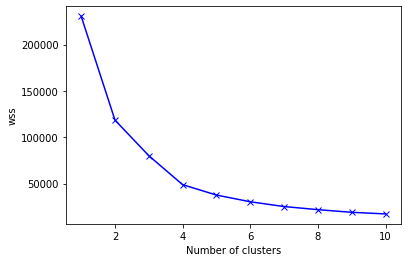

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(list(wss.keys()),list(wss.values()),"bx-")
plt.xlabel("Number of clusters")
plt.ylabel("wss")
plt.show()

* With the increase in the number of cluster there is a decrease in the WSS values.
* There is a drastic drop in WSS values up to 4 clusters, after that the drop is less.
* So, the optimum number of clusters for K-Means algorithm is 4.



Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sc={}
for i in range(2,11):
  KM=KMeans(n_clusters=i,random_state=1).fit(data_scaled)
  labels=KM.labels_
  sc[i]=silhouette_score(data_scaled,labels)


In [ ]:
for i in range(2,11):
  print(" The Silhouette score for", i, "clusters is", sc[i])

 The Silhouette score for 2 clusters is 0.5097142014231651
 The Silhouette score for 3 clusters is 0.4476543678724543
 The Silhouette score for 4 clusters is 0.5137200329813622
 The Silhouette score for 5 clusters is 0.4982125606776798
 The Silhouette score for 6 clusters is 0.4907133245293593
 The Silhouette score for 7 clusters is 0.4687432530272504
 The Silhouette score for 8 clusters is 0.4614568699167698
 The Silhouette score for 9 clusters is 0.46431085576385533
 The Silhouette score for 10 clusters is 0.4468639979174765


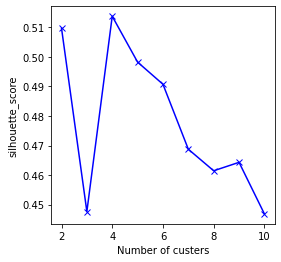

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(list(sc.keys()),list(sc.values()),"bx-")
plt.xlabel("Number of custers")
plt.ylabel("silhouette_score")
plt.show()

* The silhouette score for 4 clusters is high and with the increase in the number of clusters the silhouette decreased.
* The optimum of clusters is 4 as the silhouette score for 4 clusters is higher and also from the elbow plot we can conclude the optimum number of clusters as 4.



Profile the ads based on optimum number of clusters using silhouette score and your domain understanding    					       21-24
[Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]

In [ ]:
KM=KMeans(n_clusters=4,random_state=1).fit(data_scaled)
labels=KM.labels_

In [ ]:
df["Cluster_Kmeans"]=labels

In [ ]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster_Kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.003096,0.0,0.0,2
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.003509,0.0,0.0,2
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.002817,0.0,0.0,2
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.002020,0.0,0.0,2
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.004132,0.0,0.0,2


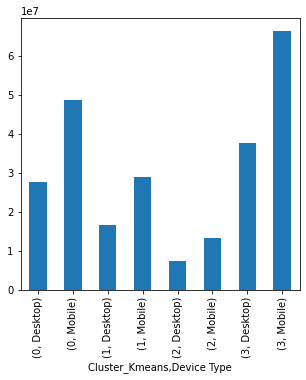

In [ ]:
df.groupby(["Cluster_Kmeans","Device Type"]).sum()["Clicks"].plot(kind="bar",figsize=(5,5))

* The number of times the user have clicked on the particular advertisement is higher for the device type - mobile higher in cluster 3 followed by the same device type in cluster 0.

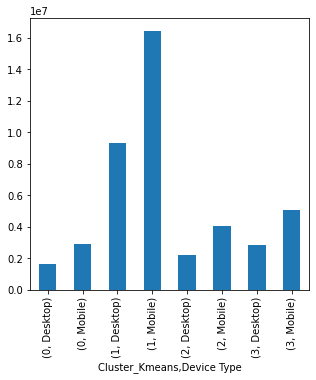

In [ ]:
df.groupby(["Cluster_Kmeans","Device Type"]).sum()["Revenue"].plot(kind="bar",figsize=(5,5))

* The revenue earned from the particular advertisement is higher for device type – mobile in cluster 1 followed by device type – desktop in the same cluster.

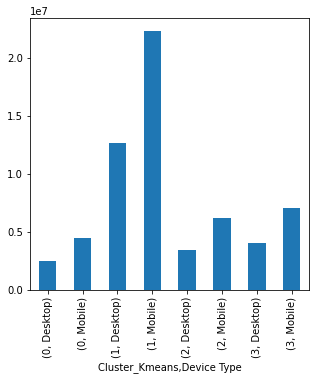

In [ ]:
df.groupby(["Cluster_Kmeans","Device Type"]).sum()["Spend"].plot(kind="bar",figsize=(5,5))

* The amount spent on specific ad variations with in a specific  campaign or ad set is higher for device type – Mobile followed by device type – desktop for the same cluster 1



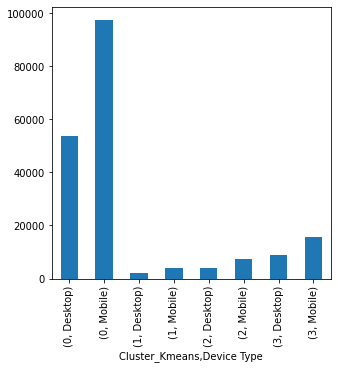

In [ ]:
df.groupby(["Cluster_Kmeans","Device Type"]).sum()["CPM"].plot(kind="bar",figsize=(5,5))

* Cost per 1000 impressions is higher for device type - Mobile followed by desktop in the same cluster 0. Least spent is for desktop in cluster 1



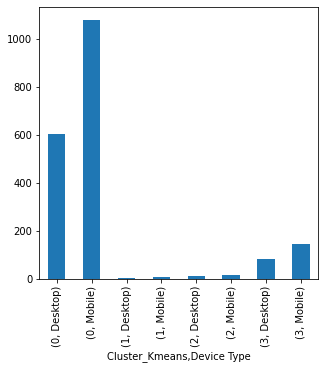

In [ ]:
df.groupby(["Cluster_Kmeans","Device Type"]).sum()["CTR"].plot(kind="bar",figsize=(5,5))

* Clicks through Rate is higher for device type - mobile followed by desktop for the same cluster 0.

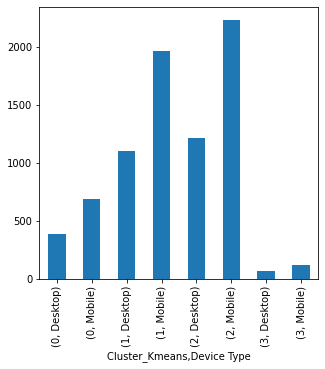

In [ ]:
df.groupby(["Cluster_Kmeans","Device Type"]).sum()["CPC"].plot(kind="bar",figsize=(5,5))

* The amount paid for Click on ad – CPC (Cost per Click) is higher for device type - mobile for cluster 2 followed by the same device type of cluster 1.

In [ ]:
pd.crosstab([df["Cluster_Kmeans"],df["Device Type"]],df["Format"],margins=True)

Format                      Display  Video    All
Cluster_Kmeans Device Type                       
0              Desktop         1953   2014   3967
               Mobile          3564   3548   7112
1              Desktop          730    724   1454
               Mobile          1312   1254   2566
2              Desktop         1122   1127   2249
               Mobile          2000   2088   4088
3              Desktop          309    281    590
               Mobile           524    516   1040
All                           11514  11552  23066

In [ ]:
pd.crosstab([df["Cluster_Kmeans"],df["Device Type"]],[df["Ad - Length"],df["Ad- Width"]],margins=True)

Ad - Length                  120   300        336   480   720   728    All
Ad- Width                    600   250  600   250    70   300    90       
Cluster_Kmeans Device Type                                                
0              Desktop      2071     1  112   296     0  1487     0   3967
               Mobile       3724     0  197   534     0  2657     0   7112
1              Desktop         0   740   36   131     0     0   547   1454
               Mobile          0  1274   73   227     0     0   992   2566
2              Desktop         0   633   78   183  1264     2    89   2249
               Mobile          5  1166  123   351  2276     6   161   4088
3              Desktop       490     0   13    53     0    34     0    590
               Mobile        875     0   27    75     0    63     0   1040
All                         7165  3814  659  1850  3540  4249  1789  23066

In [ ]:
pd.crosstab([df["Cluster_Kmeans"],df["Device Type"]],df["Platform"],margins=True)

Platform                     App  Video   Web    All
Cluster_Kmeans Device Type                          
0              Desktop         0   2369  1598   3967
               Mobile       2357   2374  2381   7112
1              Desktop         0    871   583   1454
               Mobile        856    860   850   2566
2              Desktop         0   1366   883   2249
               Mobile       1372   1343  1373   4088
3              Desktop         0    341   249    590
               Mobile        357    349   334   1040
All                         4942   9873  8251  23066

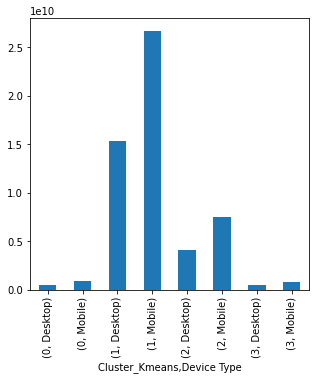

In [ ]:
df.groupby(["Cluster_Kmeans","Device Type"]).sum()["Available_Impressions"].plot(kind="bar",figsize=(5,5))

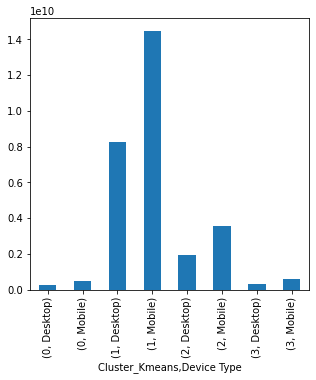

In [ ]:
df.groupby(["Cluster_Kmeans","Device Type"]).sum()["Matched_Queries"].plot(kind="bar",figsize=(5,5))

#Insights from clustering:
1.	In cluster 1, the amount of revenue earned by advertising and the amount spent are higher in both desktop and mobile. So, if we can spend more advertising in cluster 3 we can get more revenue than in any other clusters.
Whereas CTR is lower in cluster 1, so to increase it, we have to concentrate on which type of ad is getting more clicks and work on it.
2.	In all the clusters, there are more ads which are supported in mobile than in desktop which are of both display and video format.
3.	In cluster 0 and 3, there are ads which are ad-length of 120,720 and ad-width of 600,300 and are supported more in mobile device.
4.	In clusters 1 and 2, there are ads which are ad-length of 350 and ad-width of 250 and are supported more in mobile device.
5.	CPC is high in both cluster 1 and 2 for mobile type, followed by desktop. It is low in cluster 3.
6.	The number of clicks for the number of times the ad is shown is less for both clusters 1 and 3 in both mobile and desktop. It is more in cluster 0.
7.	The cost per 1000 impressions is more in cluster 0 and is less in both clusters 1 and 2
8.	The number of times the customer has clicked on the ad is more in cluster 3
9.	There are more ads on video type of format than web type of format in all the clusters, which are more in cluster 0 and 2.
10.	 Ads are shown more in mobile than in desktop and are more in cluster 1.
11.	Matched queries are more in cluster 1 which generated the more clicks in the search engine.

